<a href="https://colab.research.google.com/github/komorimasashi/Hokudai2023Resources/blob/main/GP_regression_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

### データセットの作成

$f(x) = x \sin(x)$から20点サンプリングし観測ノイズとして正規ノイズが乗っているデータを考える

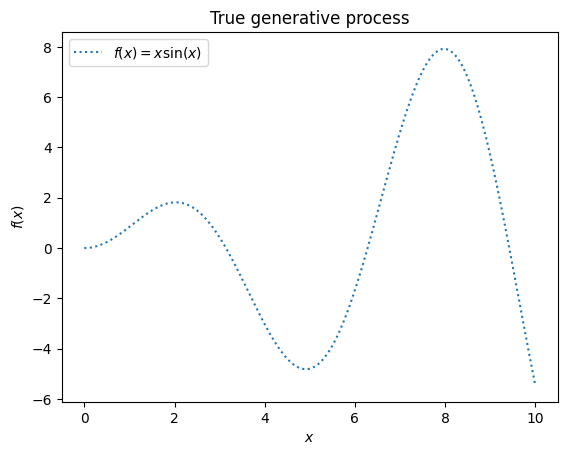

In [18]:
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [19]:
# サンプリングする
sample_size = 10
rng = np.random.RandomState(9999)
training_indices = rng.choice(np.arange(y.size), size=sample_size, replace=False)
X_train_full, y_train_full = X[training_indices], y[training_indices]

In [20]:
# 観測誤差を加える
noise_std = 1
y_train_noisy_full = y_train_full + rng.normal(loc=0.0, scale=noise_std, size=y_train_full.shape)

### 観測ノイズなし

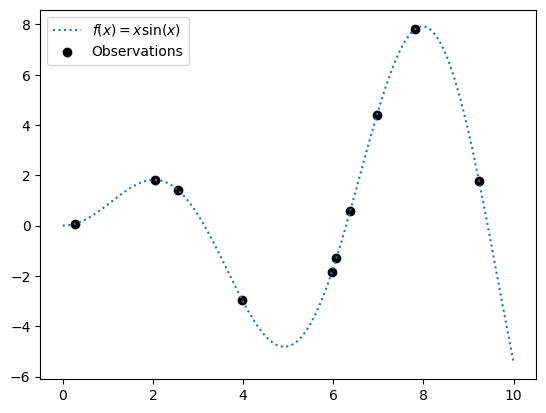

In [21]:
# 描画
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train_full, y_train_full, label="Observations",color="black")
plt.legend()

In [22]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [23]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp_noiseless =  GaussianProcessRegressor(
    kernel=kernel, alpha=0, n_restarts_optimizer=9
)
gp_noiseless.fit(X_train_full, y_train_noisy_full)

GaussianProcessRegressor(alpha=0, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

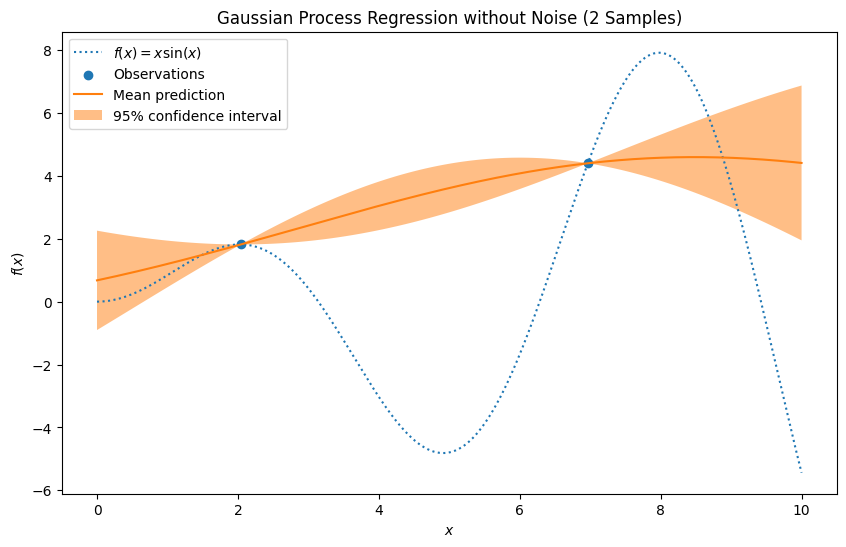

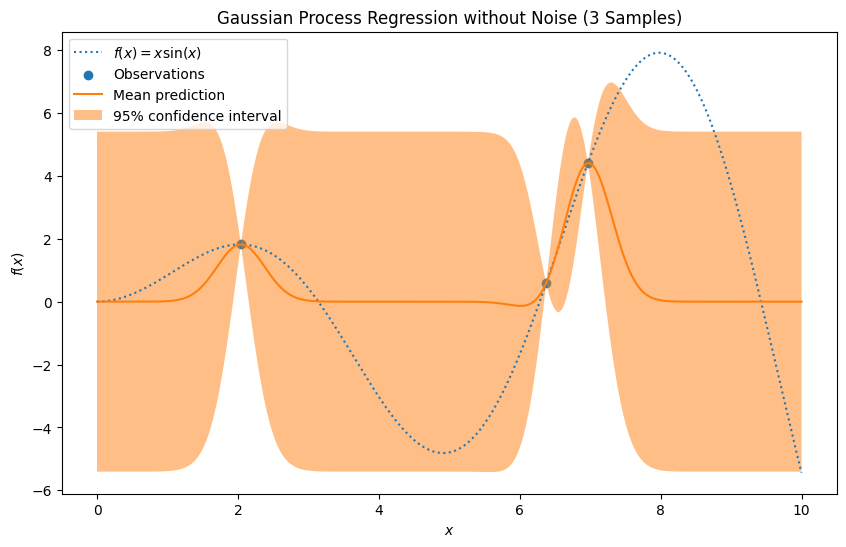

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


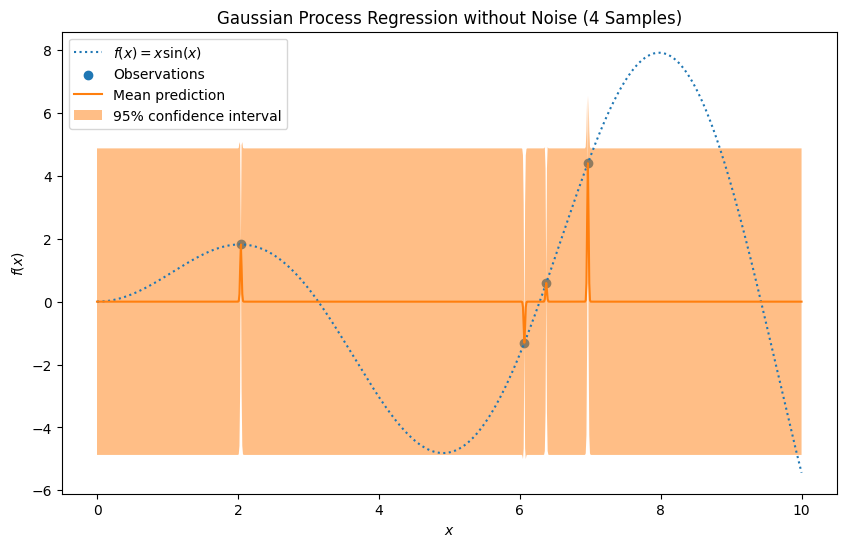

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


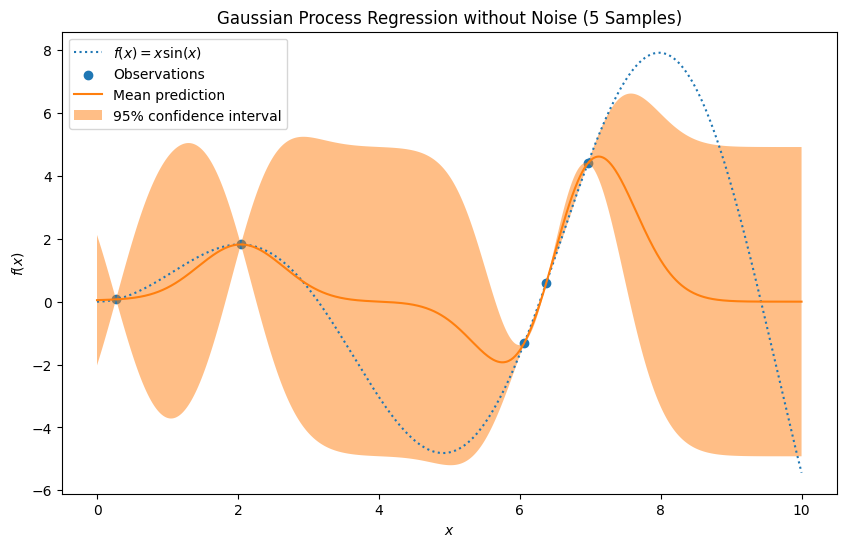

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


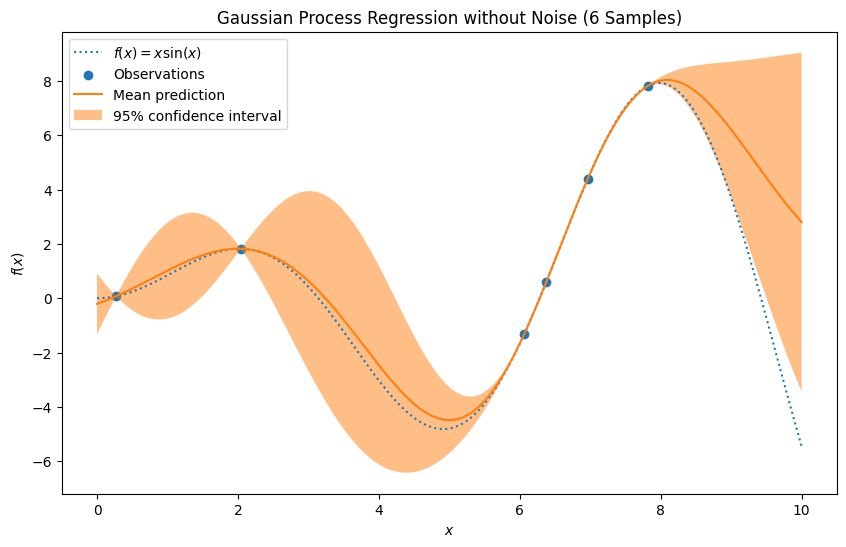

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


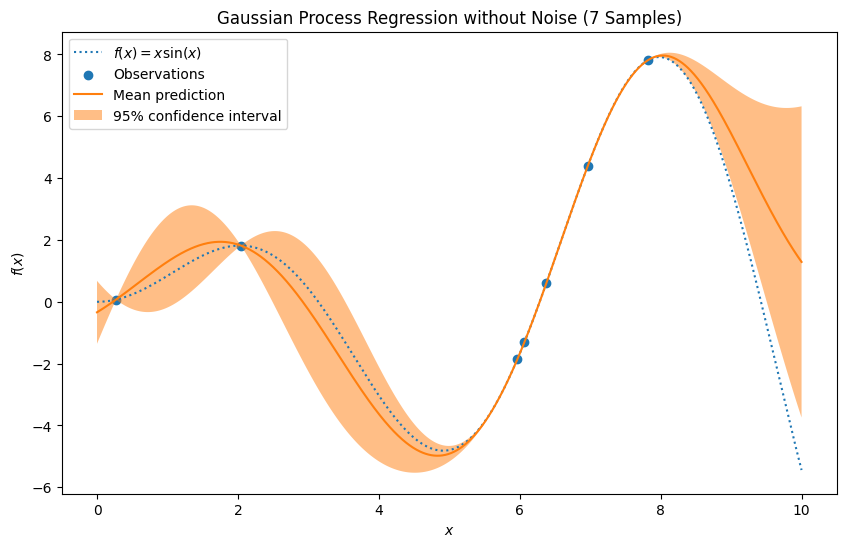

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


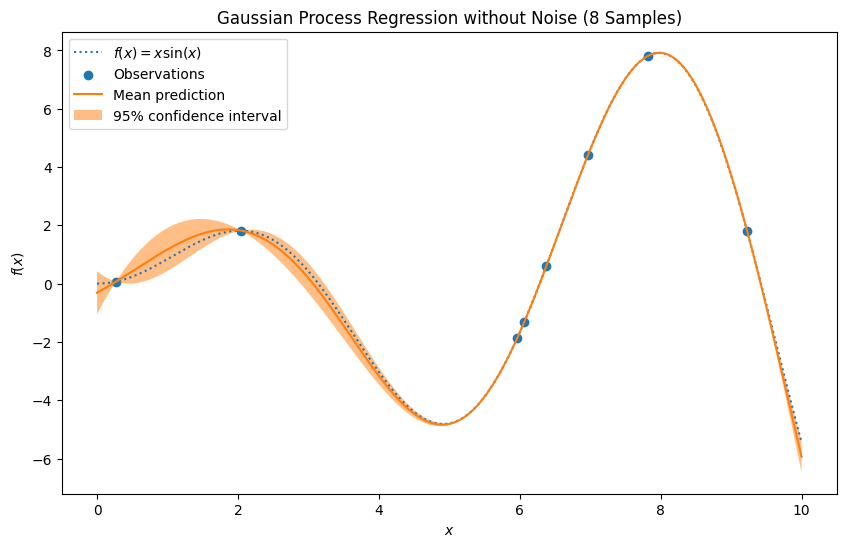

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


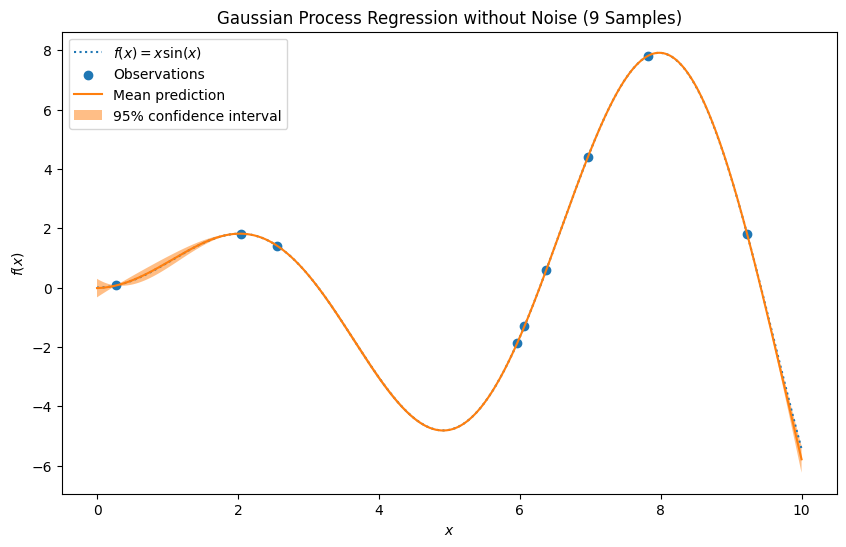

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


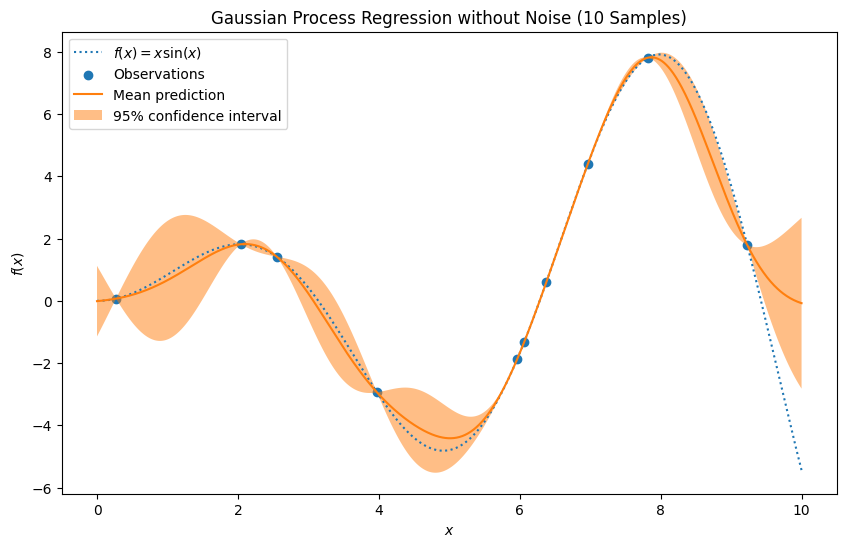

In [24]:
for sample_size in range(2, sample_size + 1):
    # 部分的なサンプリング
    X_train, y_train = X_train_full[:sample_size], y_train_full[:sample_size]

    # ガウス過程回帰モデルの生成と学習（ノイズなし）
    gp_noisy = GaussianProcessRegressor(kernel=kernel, alpha=0, n_restarts_optimizer=9)
    gp_noiseless.fit(X_train, y_train)

    # 予測値とその標準偏差を求める
    y_pred, sigma = gp_noiseless.predict(X, return_std=True)

    # 結果を描画
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    plt.scatter(X_train, y_train, label="Observations")
    plt.plot(X, y_pred, label="Mean prediction")
    plt.fill_between(X.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, label=r"95% confidence interval")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(f"Gaussian Process Regression without Noise ({sample_size} Samples)")
    plt.show()


### Matternカーネル

In [25]:
from sklearn.gaussian_process.kernels import Matern

In [35]:
kernel = 1 * 1.0 * Matern(length_scale=1.0, nu=1.5)
gp_matern =  GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gp_matern.fit(X_train_full, y_train_full)

GaussianProcessRegressor(alpha=1, kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=9)

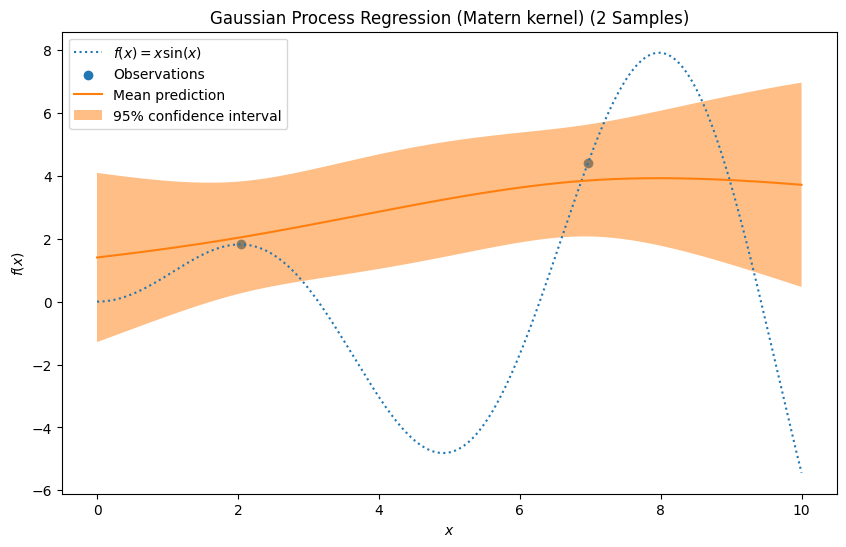

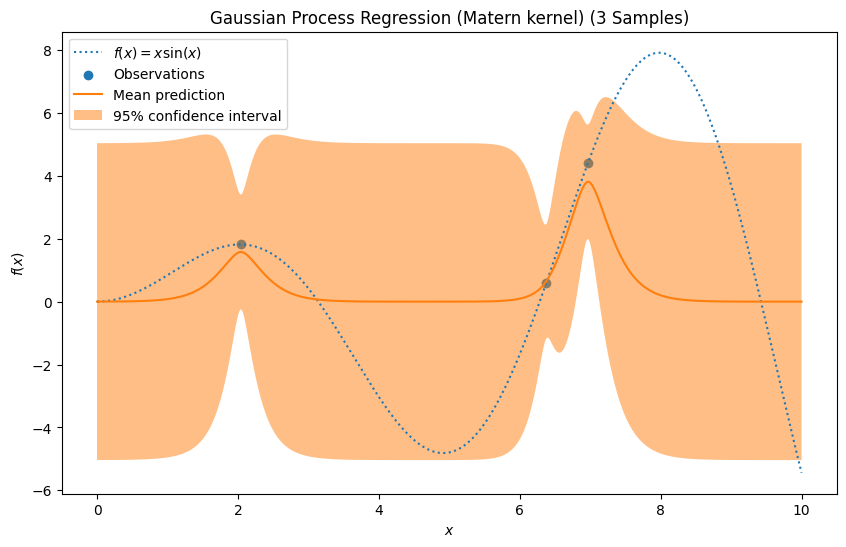

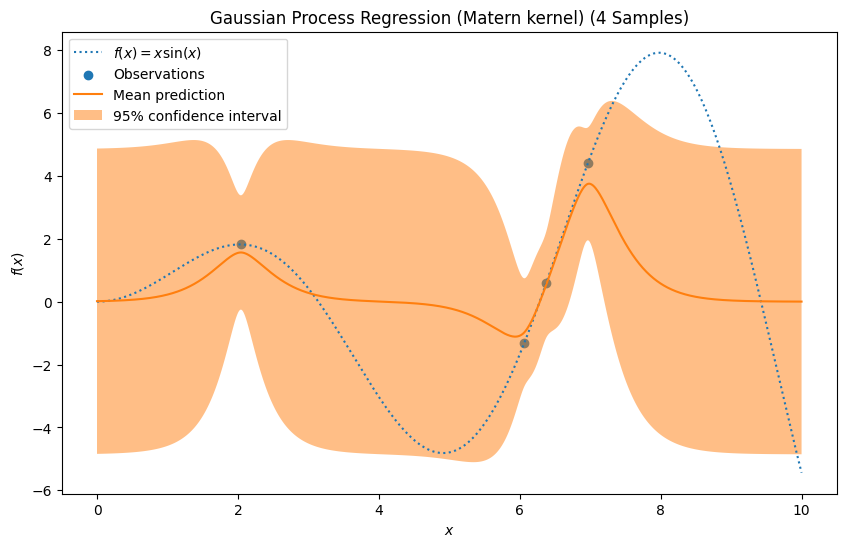

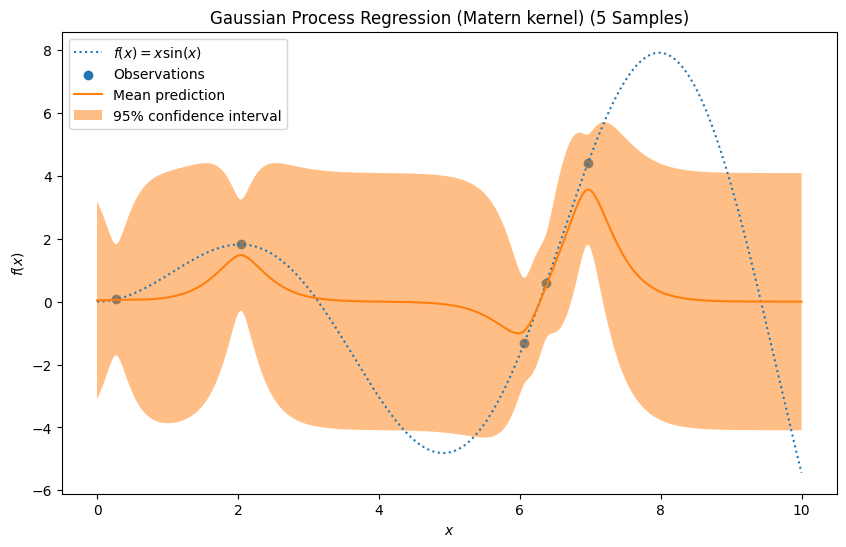

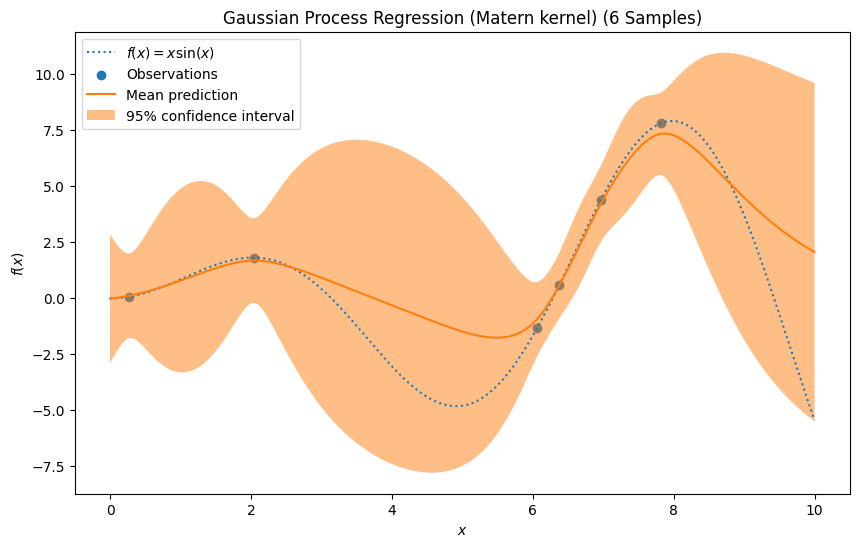

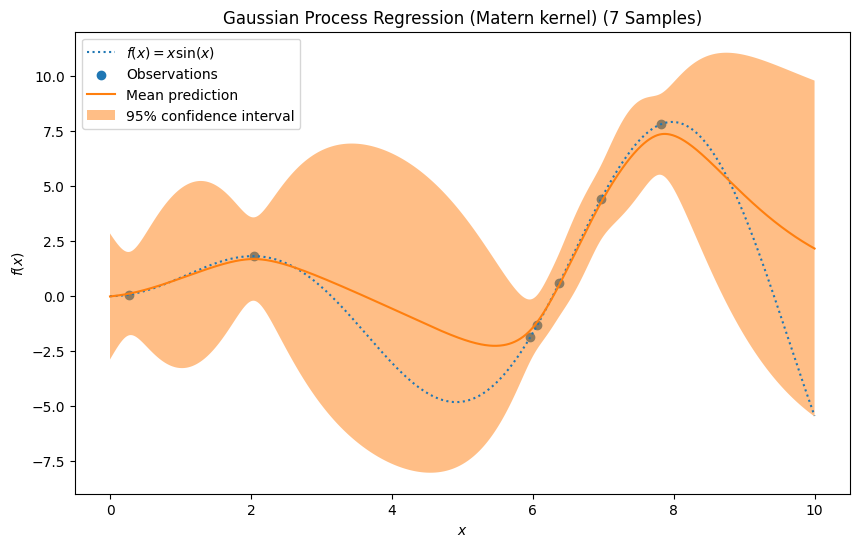

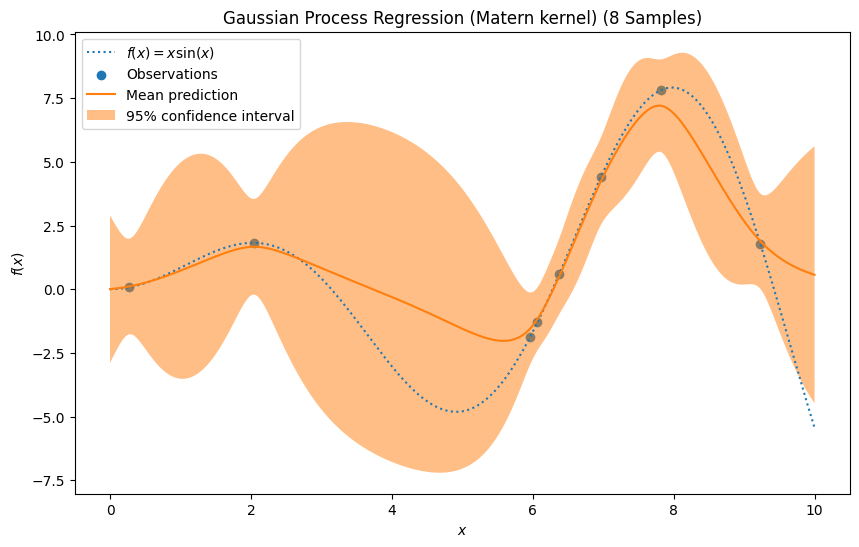

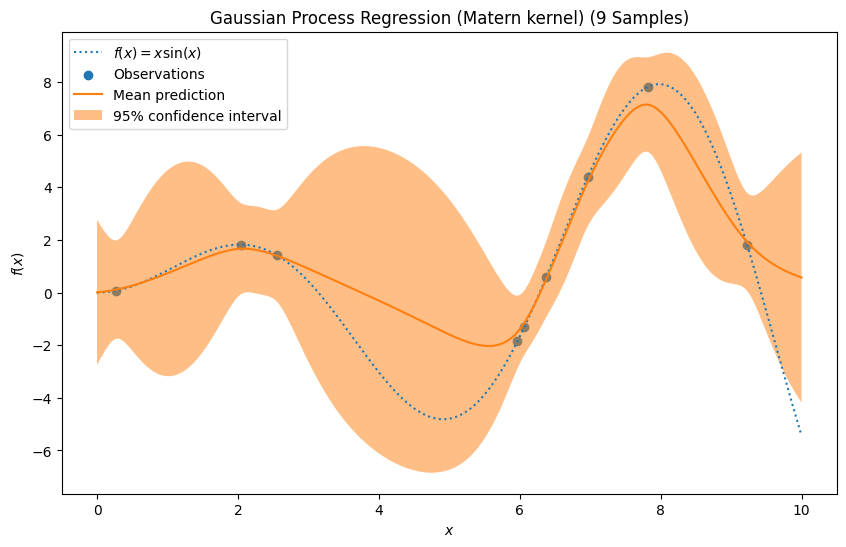

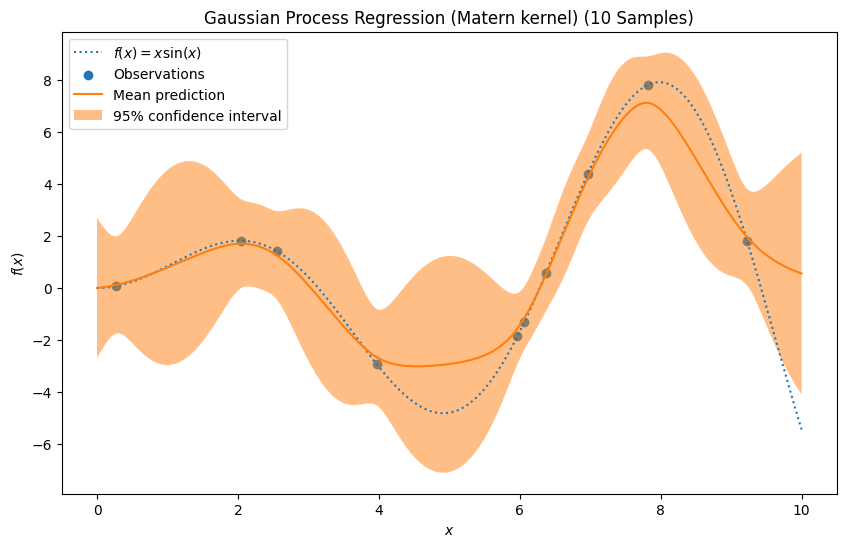

In [36]:
for sample_size in range(2, sample_size + 1):
    # 部分的なサンプリング
    X_train, y_train = X_train_full[:sample_size], y_train_full[:sample_size]

    # ガウス過程回帰モデルの生成と学習（Maternカーネル）
    gp_matern.fit(X_train, y_train)

    # 予測値とその標準偏差を求める
    y_pred, sigma = gp_matern.predict(X, return_std=True)

    # 結果を描画
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    plt.scatter(X_train, y_train, label="Observations")
    plt.plot(X, y_pred, label="Mean prediction")
    plt.fill_between(X.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, label=r"95% confidence interval")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(f"Gaussian Process Regression (Matern kernel) ({sample_size} Samples)")
    plt.show()


### 観測ノイズあり

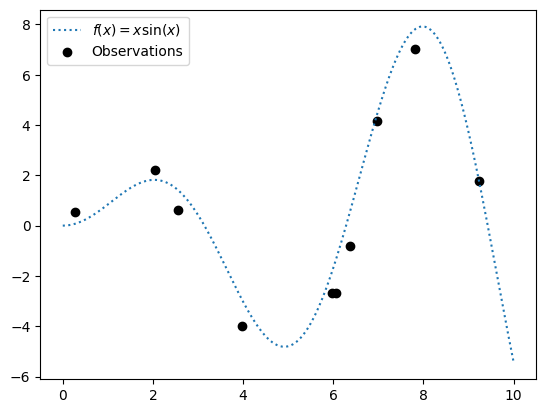

In [28]:
# 描画
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train_full, y_train_noisy_full, label="Observations",color="black")
plt.legend()

In [29]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [30]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp_noisy =  GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gp_noisy.fit(X_train_full, y_train_noisy_full)

GaussianProcessRegressor(alpha=1, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

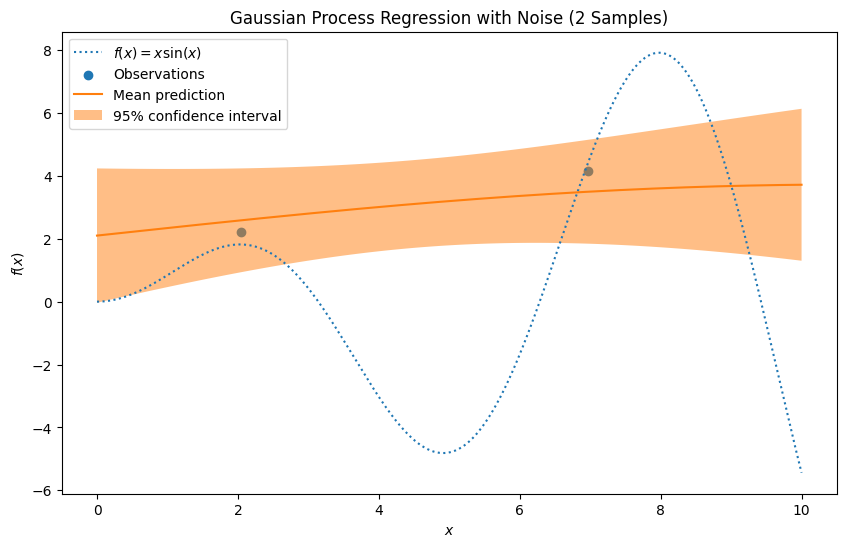

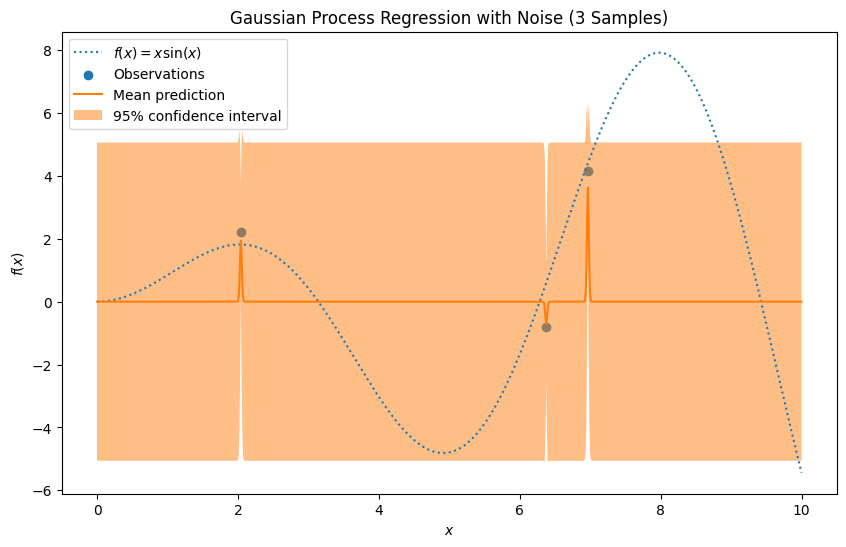

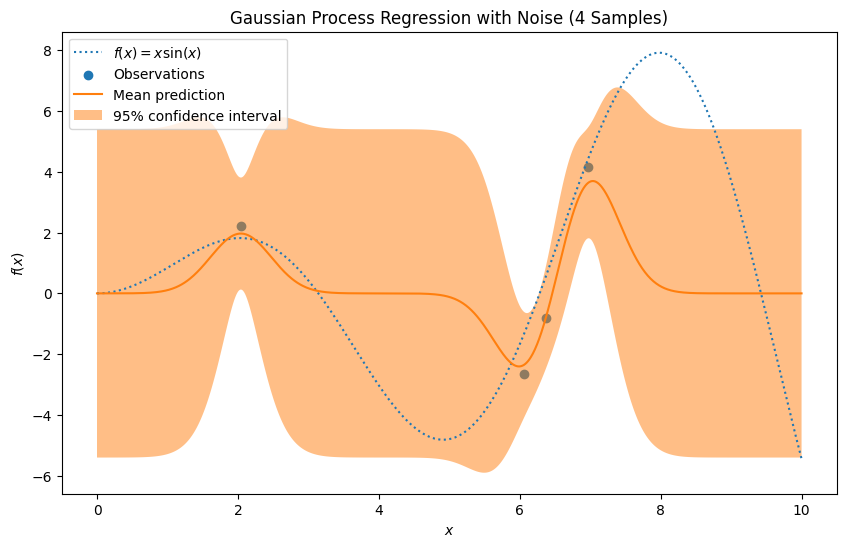

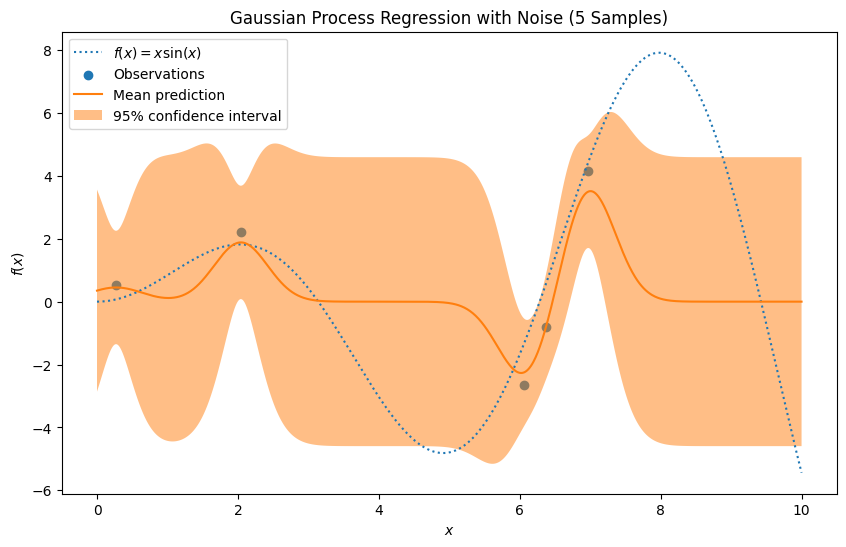

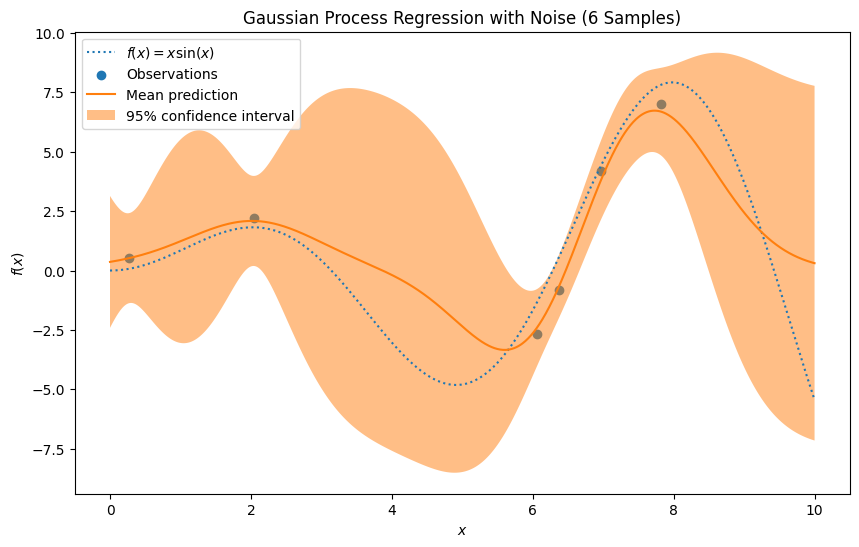

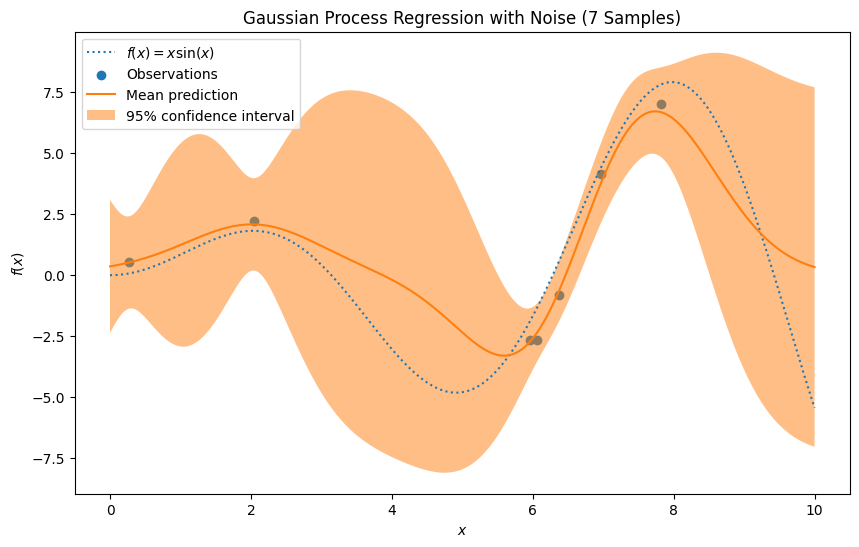

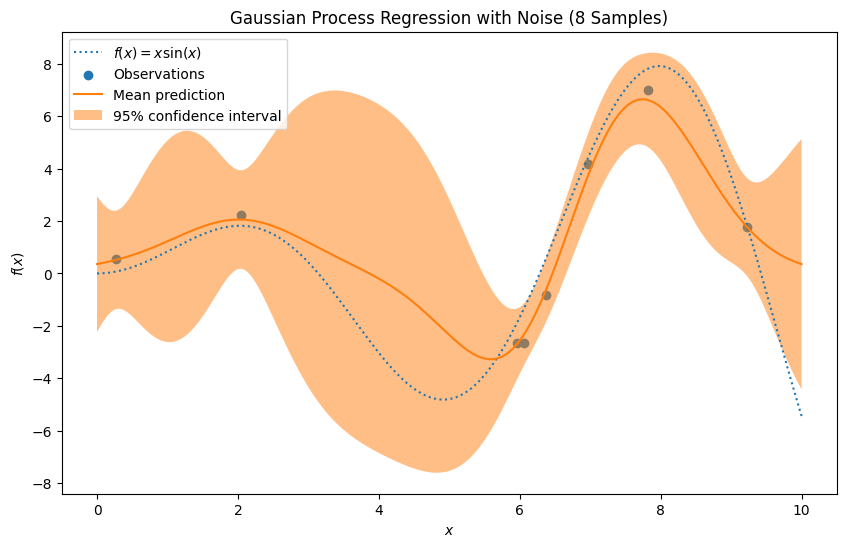

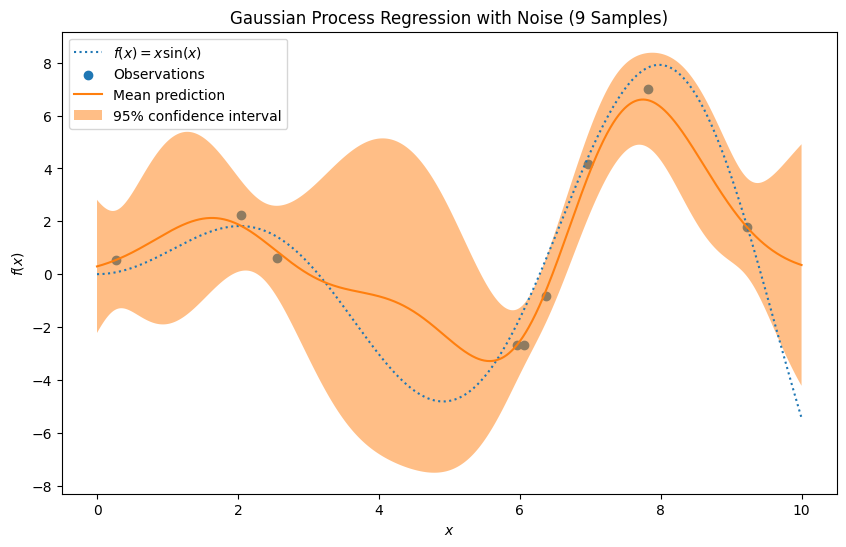

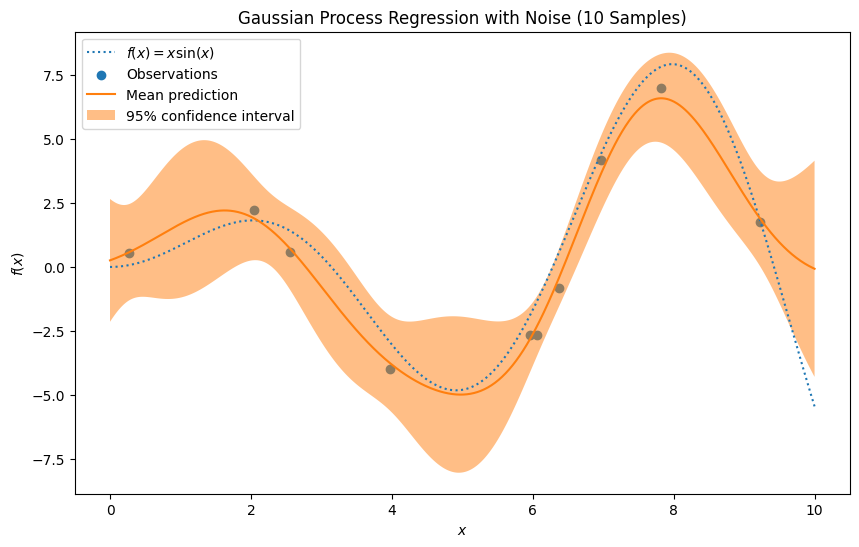

In [31]:
for sample_size in range(2, sample_size + 1):
    # 部分的なサンプリング
    X_train, y_train_noisy = X_train_full[:sample_size], y_train_noisy_full[:sample_size]

    # ガウス過程回帰モデルの生成と学習（ノイズなし）
    gp_noisy = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
    gp_noisy.fit(X_train, y_train_noisy)

    # 予測値とその標準偏差を求める
    y_pred, sigma = gp_noisy.predict(X, return_std=True)

    # 結果を描画
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    plt.scatter(X_train, y_train_noisy, label="Observations")
    plt.plot(X, y_pred, label="Mean prediction")
    plt.fill_between(X.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, label=r"95% confidence interval")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(f"Gaussian Process Regression with Noise ({sample_size} Samples)")
    plt.show()
